In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zip_sea = pd.read_csv('inputs/zip_sea.csv')

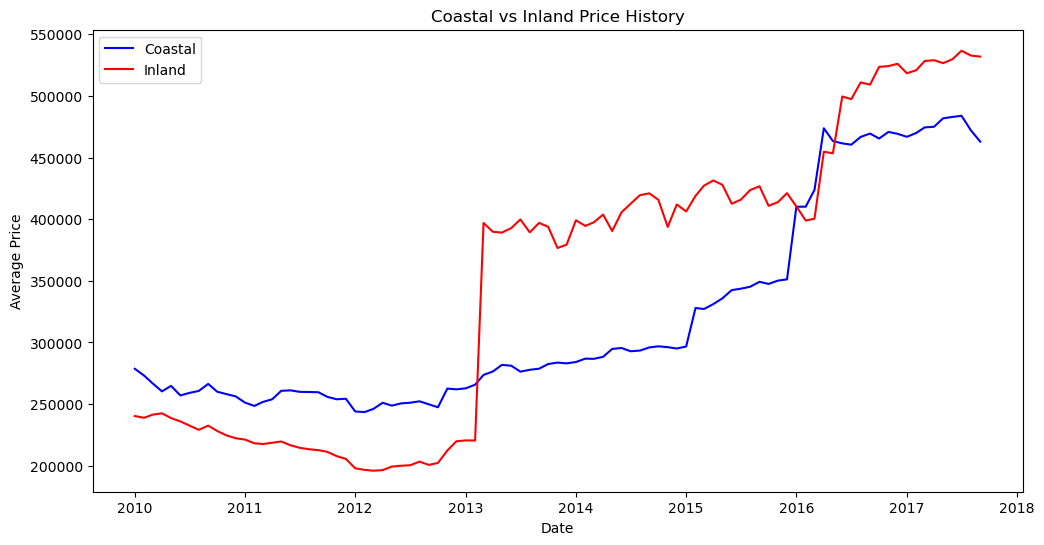

In [2]:
#1
zip_sea['Date'] = pd.to_datetime(zip_sea['Date'])

average_prices = zip_sea.groupby(['Date', 'Inland/Coastal'])['Price'].mean().reset_index()

coastal_prices = average_prices[average_prices['Inland/Coastal'] == 1]
inland_prices = average_prices[average_prices['Inland/Coastal'] == 0]

plt.figure(figsize=(12, 6))
plt.plot(coastal_prices['Date'], coastal_prices['Price'], label='Coastal', color='blue')
plt.plot(inland_prices['Date'], inland_prices['Price'], label='Inland', color='red')

plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Coastal vs Inland Price History')
plt.legend()

plt.savefig('graphs/coastal_inland_price_history.png', dpi=300, bbox_inches='tight')
plt.show()

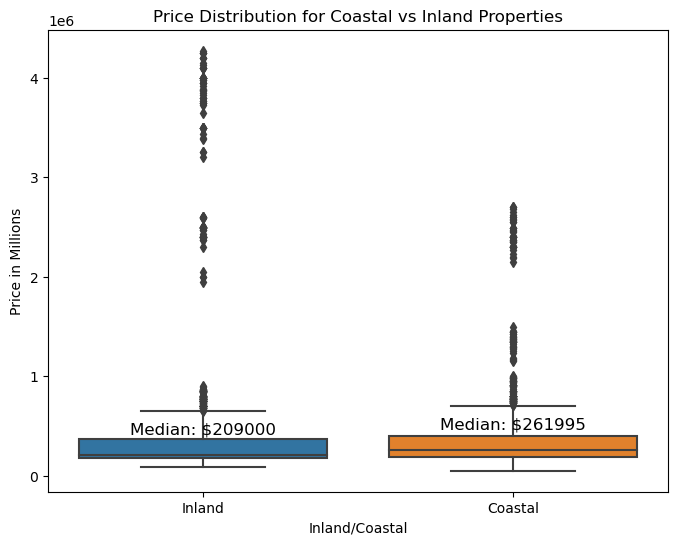

In [3]:
#2
# Add median prices to the box plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x="Inland/Coastal", y="Price", data=zip_sea)
plt.title("Price Distribution for Coastal vs Inland Properties")
plt.xticks(ticks=[0, 1], labels=["Inland", "Coastal"])

# Add median prices
medians = zip_sea.groupby(['Inland/Coastal'])['Price'].median()
for i, median in enumerate(medians):
    ax.annotate(f"Median: ${median:.0f}", (i, median),
                xytext=(0, 15), textcoords='offset points',
                fontsize=12, ha='center')
    
plt.ylabel("Price in Millions")

plt.savefig('graphs/price_distribution_coastal_vs_inland.png', dpi=300, bbox_inches='tight')
plt.show()

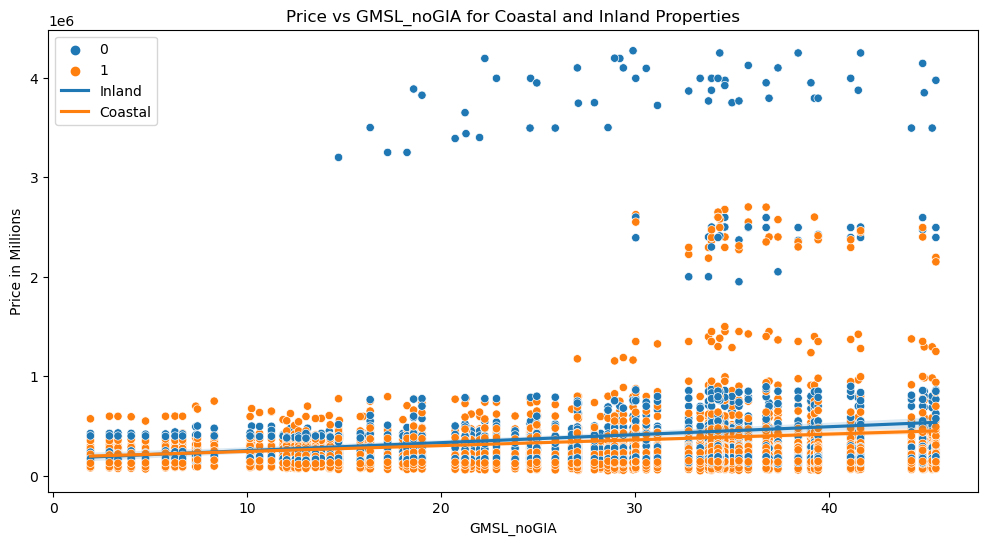

In [4]:
#3
plt.figure(figsize=(12, 6))
sns.scatterplot(x="GMSL_noGIA", y="Price", hue="Inland/Coastal", data=zip_sea)
plt.title("Price vs GMSL_noGIA for Coastal and Inland Properties")

# Add linear regression lines for each group
coastal_data = zip_sea[zip_sea["Inland/Coastal"] == 1]
inland_data = zip_sea[zip_sea["Inland/Coastal"] == 0]

sns.regplot(x="GMSL_noGIA", y="Price", data=inland_data, scatter=False, label="Inland")
sns.regplot(x="GMSL_noGIA", y="Price", data=coastal_data, scatter=False, label="Coastal")

plt.ylabel("Price in Millions")
plt.legend()
plt.savefig('graphs/price_vs_GMSL_noGIA_coastal_inland.png', dpi=300, bbox_inches='tight')
plt.show()

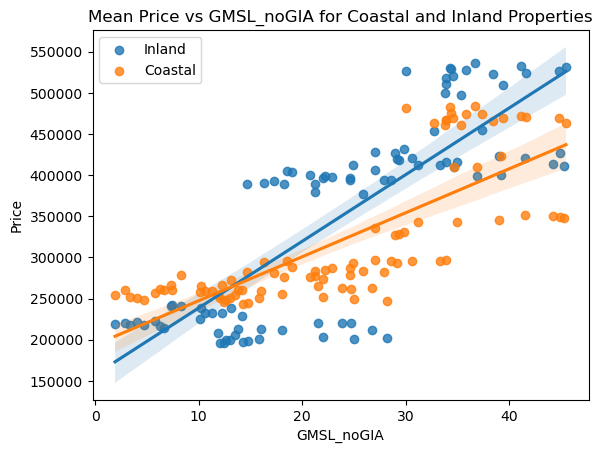

In [5]:
#4
# Calculate mean price for each GMSL_noGIA value and group
mean_prices = zip_sea.groupby(['GMSL_noGIA', 'Inland/Coastal'])['Price'].mean().reset_index()


# Add linear regression lines for each group
coastal_data = mean_prices[mean_prices["Inland/Coastal"] == 1]
inland_data = mean_prices[mean_prices["Inland/Coastal"] == 0]

sns.regplot(x="GMSL_noGIA", y="Price", data=inland_data, label="Inland")
sns.regplot(x="GMSL_noGIA", y="Price", data=coastal_data, label="Coastal")

plt.title("Mean Price vs GMSL_noGIA for Coastal and Inland Properties")
plt.legend()
plt.savefig("graphs/mean_price_vs_GMSL_noGIA.png")
plt.show()

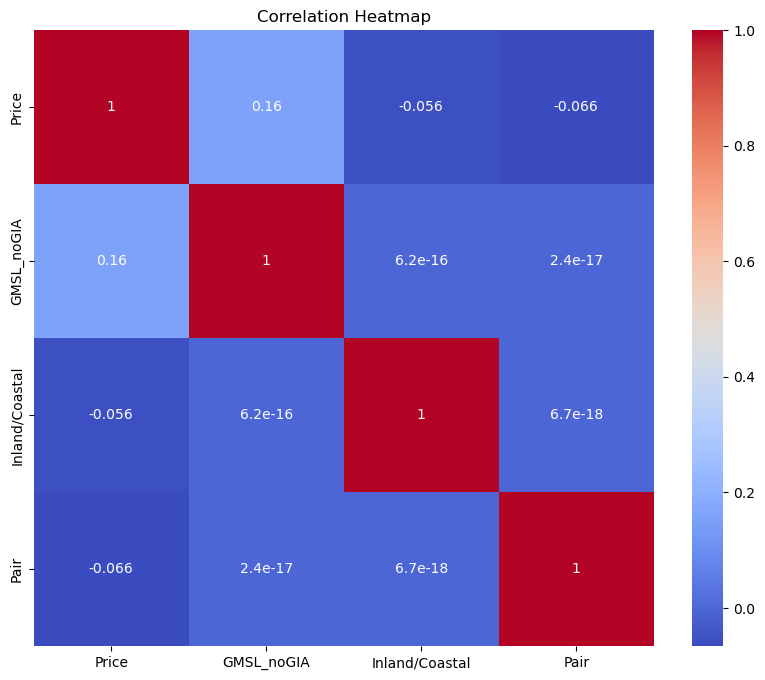

In [6]:
#5
# Correlation heatmap for selected columns
selected_columns = zip_sea[["Price", "GMSL_noGIA","Inland/Coastal","Pair"]]
corr_matrix = selected_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig("graphs/corr_heatmap.png")
plt.show()